In [1]:
import exasim_plot_helpers as eph
import ipywidgets
from obr.core.queries import query_to_dataframe, query_to_records
from copy import deepcopy
import numpy as np
import pandas as pd

import seaborn
from copy import deepcopy
import matplotlib.pyplot as plt



In [2]:
df_folder = "/home/greole/data/code/exasim_project/benchmark_data/LidDrivenCavity3D/postProcessing/{}/speedup_results.json".format("ogl_170_rev1")
df = pd.read_json(df_folder)

FileNotFoundError: File /home/greole/data/code/exasim_project/benchmark_data/LidDrivenCavity3D/postProcessing/ogl_170_rev1/speedup_results.json does not exist

In [3]:
df

,nProcs,preconditioner,executor,Host,nCells,TimeStep,SolveP,MomentumPredictor,PISOStep,solver_p
0,8,BJ,hip,nla,1000000,0.969715,1.160694,0.372904,1.100715,GKOCG
1,8,BJ,hip,nla,8000000,4.170001,6.249952,0.515796,5.454118,GKOCG
2,8,BJ,hip,nla,27000000,10.505294,16.933962,0.558329,14.431306,GKOCG
3,8,BJ,hip,nla,64000000,12.953599,20.196938,0.559395,17.467383,GKOCG
8,8,GISAI,hip,nla,1000000,1.147663,1.459703,0.374758,1.356521,GKOCG
...,...,...,...,...,...,...,...,...,...,...
151,76,Multigrid,cuda,hkn,64000000,3.099935,3.218755,1.002777,3.177262,GKOCG
156,76,none,cuda,hkn,1000000,0.010233,0.008507,0.985702,0.009222,GKOCG
157,76,none,cuda,hkn,8000000,0.195458,0.186590,1.003841,0.189712,GKOCG
158,76,none,cuda,hkn,27000000,0.996441,0.996423,0.997127,0.996395,GKOCG


In [27]:
seaborn.set(font_scale=1.25)
seaborn.set_style("whitegrid",{'grid.linestyle': 'solid'})
seaborn.set_style("ticks")


def draw_plot_faceted_plot(x="nCells",y="SolveP", 
                hue="executor", col="host", style="nProcs",logx=True,logy=True):
    ax = seaborn.relplot(x=x, y=y, hue=hue, style=style, data=df, kind="line", markers=True)
    if logx:
        plt.xscale('log')
    if logy:
        plt.yscale('log')
    plt.grid()

    return ax

df = df[df["Host"] == "hkn"]
df = df[df["preconditioner"] == "none"]   
df = df[df["nProcs"] != 76]

ipywidgets.interact(
    draw_plot_faceted_plot,
    df=df,
    x=list(df.columns), 
    y=list(df.columns),
    hue=list(df.columns),
    col=list(df.columns),
    logy=True,
    logx=True,
)

interactive(children=(Dropdown(description='x', index=4, options=('nProcs', 'preconditioner', 'executor', 'Hos…

<function __main__.draw_plot_faceted_plot(x='nCells', y='SolveP', hue='executor', col='host', style='nProcs', logx=True, logy=True)>

In [34]:
seaborn.set(font_scale=1.25)
seaborn.set_style("whitegrid",{'grid.linestyle': 'solid'})
seaborn.set_style("ticks")


def draw_plot_faceted_plot(x="nCells",y="SolveP", 
                hue="executor", col="host", style="nProcs",logx=True,logy=True):
    ax = seaborn.relplot(x=x, y=y, style=style, data=df, kind="line", markers=True)
    ax.fig.suptitle('Horeka LidDrivenCavity', fontsize=16)
    if logx:
        plt.xscale('log')
    if logy:
        plt.yscale('log')
    plt.grid()

    return ax

df = df[df["Host"] == "hkn"]
df = df[df["preconditioner"] == "none"]   
df = df[df["nProcs"] != 76]

ipywidgets.interact(
    draw_plot_faceted_plot,
    df=df,
    x=list(df.columns), 
    y=list(df.columns),
    hue=list(df.columns),
    col=list(df.columns),
    logy=True,
    logx=True,
)

interactive(children=(Dropdown(description='x', index=4, options=('nProcs', 'preconditioner', 'executor', 'Hos…

<function __main__.draw_plot_faceted_plot(x='nCells', y='SolveP', hue='executor', col='host', style='nProcs', logx=True, logy=True)>

In [12]:
df = deepcopy(dfs["LidDrivenCavity3D"])
df = df.reset_index()

def draw_plot_faceted_plot(x="nCells", y="SolveP", color="executor", column="host", case="LidDrivenCavity3D", style="nSubDomains", base_idx="executor",  base_val="CPU"):
    df = deepcopy(dfs[case])
    queries = []
    df = df[eph.helpers.idx_query_mask(df, [eph.helpers.DFQuery(idx="preconditioner", val="none", op=eph.helpers.equal())])]
    if base_idx:
        queries = [eph.helpers.DFQuery(idx=base_idx, val=base_val)]
    df = df[eph.helpers.idx_query_mask(df, [eph.helpers.DFQuery(idx="solver", val="GAMG", op=eph.helpers.not_equal())])]
    df = eph.helpers.compute_full_node_normalize(df, cpu_32.queries)
    df.index = df.index.droplevel("host")
    df = df.reset_index()
    ax = seaborn.relplot(x=x, y=y, hue=color, style=style, data=df, col=column, kind="line", markers=True)
    ax.set(ylabel=f"Speepup {y} [-]")
    # plt.xscale('log')


ipywidgets.interact(
    draw_plot_faceted_plot,
    x=list(df.columns), 
    y=list(df.columns),
    color=list(df.columns),
    column=list(df.columns),
    style=list(df.columns),
    case=list(dfs.keys()),
    base_idx="executor",
    base_val="CPU"
)

interactive(children=(Dropdown(description='x', options=('nCells', 'solver', 'executor', 'nSubDomains', 'preco…

<function __main__.draw_plot_faceted_plot(x='nCells', y='SolveP', color='executor', column='host', case='LidDrivenCavity3D', style='nSubDomains', base_idx='executor', base_val='CPU')>

In [5]:
import pandas as pd
def draw_melted_bar_plot(x='nCells', col='executor', sel="nSubDomains", value=""):
    df = deepcopy(dfs["LidDrivenCavity3D"])
    df = df.reset_index()
    melt_idx = ['MomentumPredictor', 'MatrixAssemblyU', 'MatrixAssemblyPI:', 'MatrixAssemblyPII:', 'SolveP']
    df = df[df[sel] == value]
    for m_idx in melt_idx:
        df[m_idx] = df[m_idx]/df['TimeStep']
    df = pd.melt(df,  id_vars=['nCells', 'executor', 'nSubDomains',],  value_vars=melt_idx)
    seaborn.relplot(x=x, y="value", hue="variable", data=df, col=col, kind="line", markers=True)

ipywidgets.interact(
    draw_melted_bar_plot,
    x=["nCells", "nSubDomains"], 
    col=["nCells", "nSubDomains", "executor"],
    sel=["nCells", "nSubDomains", "executor"],
    value=""
)

interactive(children=(Dropdown(description='x', options=('nCells', 'nSubDomains'), value='nCells'), Dropdown(d…

<function __main__.draw_melted_bar_plot(x='nCells', col='executor', sel='nSubDomains', value='')>

In [6]:
import pandas as pd
def draw_melted_bar_plot(x='nCells', col='executor', sel="executor", value="hip"):
    df = deepcopy(dfs["LidDrivenCavity3D"])
    df = df.reset_index()
    melt_idx = [
       'p: update_local_matrix_data:',
       'p: update_non_local_matrix_data:', 'p_matrix: call_update:',
       'p_rhs: call_update:', 'p: init_precond:', 'p: generate_solver:',
       'p: solve:', 'p: copy_x_back:']
    df = df[df[sel] == value]
    for m_idx in melt_idx:
        df[m_idx] = df[m_idx]/df['TimeStep']
    df = pd.melt(df,  id_vars=['nCells', 'executor', 'nSubDomains',],  value_vars=melt_idx)
    seaborn.relplot(x=x, y="value", hue="variable", data=df, col=col, kind="line", markers=True)

ipywidgets.interact(
    draw_melted_bar_plot,
    x=["nCells", "nSubDomains"], 
    col=["nCells", "nSubDomains", "executor"],
    sel=["nCells", "nSubDomains", "executor"],
    value="hip"
)

interactive(children=(Dropdown(description='x', options=('nCells', 'nSubDomains'), value='nCells'), Dropdown(d…

<function __main__.draw_melted_bar_plot(x='nCells', col='executor', sel='executor', value='hip')>

In [8]:
arrays = [['Falcon', 'Falcon', 'Parrot', 'Parrot'],
          ['Captive', 'Wild', 'Captive', 'Wild']]
index = pd.MultiIndex.from_arrays(arrays, names=('Animal', 'Type'))
df = pd.DataFrame({'Max Speed': [390., 350., 30., 20.], 'Ref Speed': [2., 2., 4., 4.]},
                  index=index)
df

Max Speed  Ref Speed
Animal Type                         
Falcon Captive      390.0        2.0
       Wild         350.0        2.0
Parrot Captive       30.0        4.0
       Wild          20.0        4.0

In [9]:
def get_ref(x):
    wild_value_query = eph.helpers.DFQuery("Type", "Wild")
    print(eph.helpers.idx_query(x, [wild_value_query]))
    print(x)
    return x
df.groupby(["Ref Speed"]).apply(get_ref)

             Max Speed  Ref Speed
Animal Type                      
Falcon Wild      350.0        2.0
                Max Speed  Ref Speed
Animal Type                         
Falcon Captive      390.0        2.0
       Wild         350.0        2.0
             Max Speed  Ref Speed
Animal Type                      
Parrot Wild       20.0        4.0
                Max Speed  Ref Speed
Animal Type                         
Parrot Captive       30.0        4.0
       Wild          20.0        4.0


/tmp/ipykernel_3069513/2132292774.py:7: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df.groupby(["Ref Speed"]).apply(get_ref)


Max Speed  Ref Speed
Animal Type                         
Falcon Captive      390.0        2.0
       Wild         350.0        2.0
Parrot Captive       30.0        4.0
       Wild          20.0        4.0

In [10]:
dfs["LidDrivenCavity3D"]

jobid  \
nCells     solver executor nSubDomains preconditioner                                     
1000000.0  GKOCG  hip      8.0         BJ              aacc754c2b14370e64959b9b20a8fc2e   
                                       none            4e9f3961b69793445a07292ad6db0e4b   
                                       none            0e049029694e0630541fb7febb30db37   
                                       none            1d4690a7a6a9c6668af28ed51df46003   
                           16.0        BJ              55b3c61c3e7cc5109a9cdfa11ab23ab0   
...                                                                                 ...   
64000000.0 PCG    CPU      8.0         none            60b9c3d29d086e917f10fa5f341a6dc1   
                           16.0        none            cc9ce94942d51cfd2233b6f2a3b02172   
                                       none            f702cdcc97987bb0d5ca6472c8d2270e   
                           32.0        none            db8e3e51b62bfa04d36f52ee476e525d   
                                       none            8d477a6bc48e190bb3e21e59f71e3501   

                                                                        host  \
nCells     solver executor nSubDomains preconditioner                          
1000000.0  GKOCG  hip      8.0         BJ              nla-gpu2.ianm.kit.edu   
                                       none            nla-gpu2.ianm.kit.edu   
                                       none            nla-gpu2.ianm.kit.edu   
                                       none            nla-gpu2.ianm.kit.edu   
                           16.0        BJ              nla-gpu2.ianm.kit.edu   
...                                                                      ...   
64000000.0 PCG    CPU      8.0         none            nla-gpu2.ianm.kit.edu   
                           16.0        none            nla-gpu2.ianm.kit.edu   
                                       none            nla-gpu2.ianm.kit.edu   
                           32.0        none            nla-gpu2.ianm.kit.edu   
                                       none            nla-gpu2.ianm.kit.edu   

                                                                 campaign  \
nCells     solver executor nSubDomains preconditioner                       
1000000.0  GKOCG  hip      8.0         BJ                   MVAPICH + GDR   
                                       none                 MVAPICH + GDR   
                                       none            OMPI + HOST_BUFFER   
                                       none            OMPI + HOST_BUFFER   
                           16.0        BJ                   MVAPICH + GDR   
...                                                                   ...   
64000000.0 PCG    CPU      8.0         none            OMPI + HOST_BUFFER   
                           16.0        none                 MVAPICH + GDR   
                                       none            OMPI + HOST_BUFFER   
                           32.0        none            OMPI + HOST_BUFFER   
                                       none                 MVAPICH + GDR   

                                                      tags  \
nCells     solver executor nSubDomains preconditioner        
1000000.0  GKOCG  hip      8.0         BJ              nla   
                                       none            nla   
                                       none                  
                                       none                  
                           16.0        BJ              nla   
...                                                    ...   
64000000.0 PCG    CPU      8.0         none                  
                           16.0        none            nla   
                                       none                  
                           32.0        none                  
                                       none            nla   

                                                

In [7]:
arrays = [
    ["bar", "bar", "bar", "baz", "baz", "qux", "qux", "qux"],
    ["b", "a", "a", "a", "b", "d", "d", "d"],
]
tuples = list(zip(*arrays))
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])

v = [3,4,2,3,3,3,4,4]
vs = ["a3","a4","a2","b3","b3","c3","c4","c4"]
s = pd.DataFrame({"num":v, "val": vs}, index=index)

In [8]:
s

num val
first second         
bar   b         3  a3
      a         4  a4
      a         2  a2
baz   a         3  b3
      b         3  b3
qux   d         3  c3
      d         4  c4
      d         4  c4

In [9]:
r = s.loc["baz"]
rval = r.select_dtypes(include=np.number)
snonval = s.select_dtypes(exclude=np.number)
sval = s.select_dtypes(include=np.number)

In [10]:
res = sval/rval
res

num
first second          
bar   b       1.000000
      a       1.333333
      a       0.666667
baz   a       1.000000
      b       1.000000
qux   d            NaN
      d            NaN
      d            NaN

In [11]:
res["val"] = snonval["val"]
res

num val
first second              
bar   b       1.000000  a3
      a       1.333333  a4
      a       0.666667  a2
baz   a       1.000000  b3
      b       1.000000  b3
qux   d            NaN  c3
      d            NaN  c4
      d            NaN  c4

In [12]:
snonval.index.is_unique

False

In [24]:
r.index.is_unique

True

In [25]:
rval/sval

num
first second      
bar   b       1.00
      a       0.75
      a       1.50
baz   a       1.00
      b       1.00
qux   d        NaN
      d        NaN
      d        NaN

In [18]:
df

,nCells,solver,executor,nSubDomains,preconditioner,jobid,host,campaign,tags,timestamp,...,cont_error_local,cont_error_cumulative,p: update_local_matrix_data:,p: update_non_local_matrix_data:,p_matrix: call_update:,p_rhs: call_update:,p: init_precond:,p: generate_solver:,p: solve:,p: copy_x_back:
0,1000000.0,GKOCG,hip,8.0,BJ,aacc754c2b14370e64959b9b20a8fc2e,nla-gpu2.ianm.kit.edu,host_buffer,nla,2023-07-05_21:34:22,...,1.401410e-08,1.416940e-20,1.611053,0.039947,2.385368,0.511421,0.177263,0.002105,176.721895,0.374526
1,1000000.0,GKOCG,hip,8.0,none,4e9f3961b69793445a07292ad6db0e4b,nla-gpu2.ianm.kit.edu,host_buffer,nla,2023-07-05_16:04:03,...,1.289780e-08,1.594870e-20,1.669895,0.042474,1.984263,1.282947,0.044211,0.004316,175.584684,0.377579
2,1000000.0,GKOCG,hip,8.0,none,0e049029694e0630541fb7febb30db37,nla-gpu2.ianm.kit.edu,case,,2023-06-26_15:12:26,...,1.250990e-08,-2.608710e-20,5.283053,0.081421,2.775000,1.328474,0.033789,0.002105,307.271105,0.455737
3,1000000.0,GKOCG,hip,8.0,none,1d4690a7a6a9c6668af28ed51df46003,nla-gpu2.ianm.kit.edu,case,,2023-06-27_04:32:40,...,1.432220e-08,-9.886160e-20,5.361158,0.078474,2.846263,0.826105,0.035632,0.001789,309.884211,0.454105
4,1000000.0,GKOCG,hip,16.0,BJ,55b3c61c3e7cc5109a9cdfa11ab23ab0,nla-gpu2.ianm.kit.edu,host_buffer,nla,2023-07-05_21:35:58,...,1.405580e-08,-5.306950e-20,0.911000,0.023421,1.884211,0.423579,0.163895,0.003105,197.718053,0.197053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,64000000.0,PCG,CPU,8.0,none,60b9c3d29d086e917f10fa5f341a6dc1,nla-gpu2.ianm.kit.edu,case,,2023-06-26_16:49:17,...,1.350360e-07,1.337470e-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,64000000.0,PCG,CPU,16.0,none,cc9ce94942d51cfd2233b6f2a3b02172,nla-gpu2.ianm.kit.edu,host_buffer,nla,2023-03-26_14:34:01,...,1.328890e-07,3.123760e-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,64000000.0,PCG,CPU,16.0,none,f702cdcc97987bb0d5ca6472c8d2270e,nla-gpu2.ianm.kit.edu,case,,2023-06-27_04:33:03,...,1.328890e-07,3.123760e-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,64000000.0,PCG,CPU,32.0,none,db8e3e51b62bfa04d36f52ee476e525d,nla-gpu2.ianm.kit.edu,case,,2023-06-26_12:11:17,...,1.336480e-07,2.760780e-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df[df['host'].notna()]

,nCells,solver,executor,nSubDomains,preconditioner,jobid,host,campaign,tags,timestamp,...,cont_error_local,cont_error_cumulative,p: update_local_matrix_data:,p: update_non_local_matrix_data:,p_matrix: call_update:,p_rhs: call_update:,p: init_precond:,p: generate_solver:,p: solve:,p: copy_x_back:
0,1000000.0,GKOCG,hip,8.0,BJ,aacc754c2b14370e64959b9b20a8fc2e,nla-gpu2.ianm.kit.edu,host_buffer,nla,2023-07-05_21:34:22,...,1.401410e-08,1.416940e-20,1.611053,0.039947,2.385368,0.511421,0.177263,0.002105,176.721895,0.374526
1,1000000.0,GKOCG,hip,8.0,none,4e9f3961b69793445a07292ad6db0e4b,nla-gpu2.ianm.kit.edu,host_buffer,nla,2023-07-05_16:04:03,...,1.289780e-08,1.594870e-20,1.669895,0.042474,1.984263,1.282947,0.044211,0.004316,175.584684,0.377579
2,1000000.0,GKOCG,hip,8.0,none,0e049029694e0630541fb7febb30db37,nla-gpu2.ianm.kit.edu,case,,2023-06-26_15:12:26,...,1.250990e-08,-2.608710e-20,5.283053,0.081421,2.775000,1.328474,0.033789,0.002105,307.271105,0.455737
3,1000000.0,GKOCG,hip,8.0,none,1d4690a7a6a9c6668af28ed51df46003,nla-gpu2.ianm.kit.edu,case,,2023-06-27_04:32:40,...,1.432220e-08,-9.886160e-20,5.361158,0.078474,2.846263,0.826105,0.035632,0.001789,309.884211,0.454105
4,1000000.0,GKOCG,hip,16.0,BJ,55b3c61c3e7cc5109a9cdfa11ab23ab0,nla-gpu2.ianm.kit.edu,host_buffer,nla,2023-07-05_21:35:58,...,1.405580e-08,-5.306950e-20,0.911000,0.023421,1.884211,0.423579,0.163895,0.003105,197.718053,0.197053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,64000000.0,PCG,CPU,8.0,none,60b9c3d29d086e917f10fa5f341a6dc1,nla-gpu2.ianm.kit.edu,case,,2023-06-26_16:49:17,...,1.350360e-07,1.337470e-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,64000000.0,PCG,CPU,16.0,none,cc9ce94942d51cfd2233b6f2a3b02172,nla-gpu2.ianm.kit.edu,host_buffer,nla,2023-03-26_14:34:01,...,1.328890e-07,3.123760e-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,64000000.0,PCG,CPU,16.0,none,f702cdcc97987bb0d5ca6472c8d2270e,nla-gpu2.ianm.kit.edu,case,,2023-06-27_04:33:03,...,1.328890e-07,3.123760e-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,64000000.0,PCG,CPU,32.0,none,db8e3e51b62bfa04d36f52ee476e525d,nla-gpu2.ianm.kit.edu,case,,2023-06-26_12:11:17,...,1.336480e-07,2.760780e-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
old = {
    "nNodes": [1,2,4,10,1,2,4,10],
    "TimeStep": [2.95, 2.59, 2.31, 1.33, 3.80, 3.51, 2.80, 2.44],
    "nCells": [64000000,64000000,64000000,64000000,125000000,125000000,125000000,125000000],
    "version": ["1.5.0"] * 8
    
}
df_old = pd.DataFrame.from_dict(old)

In [22]:
import pandas as pd

df_json = '{"preconditioner":{"8":"none","9":"none","10":"none","11":"none","12":"none","13":"none","14":"none","15":"none"},"executor":{"8":"cuda","9":"cuda","10":"cuda","11":"cuda","12":"cuda","13":"cuda","14":"cuda","15":"cuda"},"nNodes":{"8":1,"9":2,"10":5,"11":10,"12":1,"13":2,"14":5,"15":10},"nCells":{"8":64000000,"9":64000000,"10":64000000,"11":64000000,"12":125000000,"13":125000000,"14":125000000,"15":125000000},"Host":{"8":"hkn","9":"hkn","10":"hkn","11":"hkn","12":"hkn","13":"hkn","14":"hkn","15":"hkn"},"nProcs":{"8":9.5,"9":9.5,"10":9.5,"11":9.5,"12":9.5,"13":9.5,"14":9.5,"15":9.5},"TimeStep":{"8":4.5971737498,"9":3.5199664099,"10":1.6320034159,"11":0.9413166169,"12":5.9129097287,"13":4.6857468708,"14":2.4995347193,"15":1.9930400522},"SolveP":{"8":6.703406742,"9":4.6355601464,"10":1.8536125725,"11":1.0016397237,"12":8.9118486406,"13":6.3566826764,"14":2.8906705123,"15":2.2075024079},"MomentumPredictor":{"8":0.233120908,"9":0.2629526064,"10":0.2438233801,"11":0.2837662309,"12":0.2164008287,"13":0.274954239,"14":0.2488149916,"15":0.2974839715},"PISOStep":{"8":5.9005369511,"9":4.2143586259,"10":1.7765400997,"11":0.9831482627,"12":7.8346770801,"13":5.7163352471,"14":2.7527107738,"15":2.1336134665},"p_NoIterations":{"8":0.968103738,"9":0.9885158306,"10":0.9784972878,"11":0.9674946821,"12":0.9926760009,"13":0.9627253409,"14":1.000337795,"15":0.9784510467},"fvOps":{"8":0.2175249522,"9":0.2840936201,"10":0.6127438155,"11":1.0623418115,"12":0.1691214725,"13":0.21341315,"14":0.4000744588,"15":0.5017460632},"fvOpsPIter":{"8":0.22469178,"9":0.2873941027,"10":0.6262090076,"11":1.0980337476,"12":0.1703692568,"13":0.2216760492,"14":0.3999393612,"15":0.5127962864},"nCellsPerRank":{"8":0.1052631579,"9":0.1052631579,"10":0.1052631579,"11":0.1052631579,"12":0.1052631579,"13":0.1052631579,"14":0.1052631579,"15":0.1052631579},"solver_p":{"8":"GKOCG","9":"GKOCG","10":"GKOCG","11":"GKOCG","12":"GKOCG","13":"GKOCG","14":"GKOCG","15":"GKOCG"}}'
df = pd.read_json(df_json)
df_new = df[["TimeStep","nCells","nNodes"]]
df_new["version"] = "1.7.0"

/tmp/ipykernel_1596855/4077115595.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["version"] = "1.7.0"


In [23]:
df_c = pd.concat([df_new,df_old])

In [28]:
import seaborn as sb

/tmp/ipykernel_1596855/526357800.py:2: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sb.relplot(df_c, y="TimeStep", x="nNodes", hue="nCells", style="version", kind="line", markers=True, palette=palette)


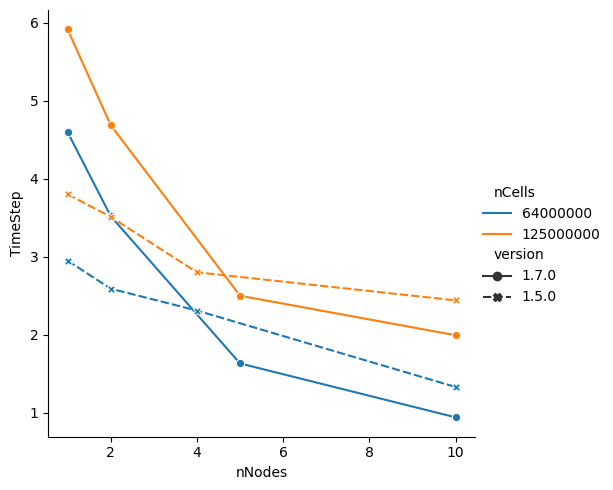

In [30]:
palette=sb.color_palette("tab10")
sb.relplot(df_c, y="TimeStep", x="nNodes", hue="nCells", style="version", kind="line", markers=True, palette=palette)